In [56]:
#import dependencies
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, LineString

import glob
from os import path, getcwd



from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
%matplotlib inline


In [57]:
# load from csv
house_price_index = pd.read_csv("./UK-HPI-full-file-2020-06.csv")
house_price_index = house_price_index.assign(Date = pd.to_datetime(house_price_index['Date'],
                                                                   format='%d/%m/%Y'))

In [58]:
house_price_index.head()

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,2004-01-01,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,2004-02-01,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,2004-03-01,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,2004-04-01,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,2004-05-01,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


In [59]:
#see what areas are included in the data set so we can pull out the boroughs of London, as well as compare with other cities

print(house_price_index['RegionName'].unique())


['Aberdeenshire' 'Adur' 'Allerdale' 'Amber Valley' 'Angus'
 'Antrim and Newtownabbey' 'Ards and North Down' 'Argyll and Bute'
 'Armagh City Banbridge and Craigavon' 'Arun' 'Ashfield' 'Ashford'
 'Aylesbury Vale' 'Babergh' 'Barking and Dagenham' 'Barnet' 'Barnsley'
 'Barrow-in-Furness' 'Basildon' 'Basingstoke and Deane' 'Bassetlaw'
 'Bath and North East Somerset' 'Bedford' 'Belfast' 'Bexley' 'Birmingham'
 'Blaby' 'Blackburn with Darwen' 'Blackpool' 'Blaenau Gwent' 'Bolsover'
 'Bolton' 'Boston' 'Bournemouth Christchurch and Poole' 'Bracknell Forest'
 'Bradford' 'Braintree' 'Breckland' 'Brent' 'Brentwood' 'Bridgend'
 'Brighton and Hove' 'Broadland' 'Bromley' 'Bromsgrove' 'Broxbourne'
 'Broxtowe' 'Buckinghamshire' 'Burnley' 'Bury' 'Caerphilly' 'Calderdale'
 'Cambridge' 'Cambridgeshire' 'Camden' 'Cannock Chase' 'Canterbury'
 'Cardiff' 'Carlisle' 'Carmarthenshire' 'Castle Point'
 'Causeway Coast and Glens' 'Central Bedfordshire' 'Ceredigion'
 'Charnwood' 'Chelmsford' 'Cheltenham' 'Cherwell' '

In [60]:
# filter by region
house_price_index = house_price_index[house_price_index['RegionName'].isin(['Birmingham','Bristol','Inner London','Manchester',
                                                                            'City of Glasgow','City of Edinburgh','Cardiff'])]



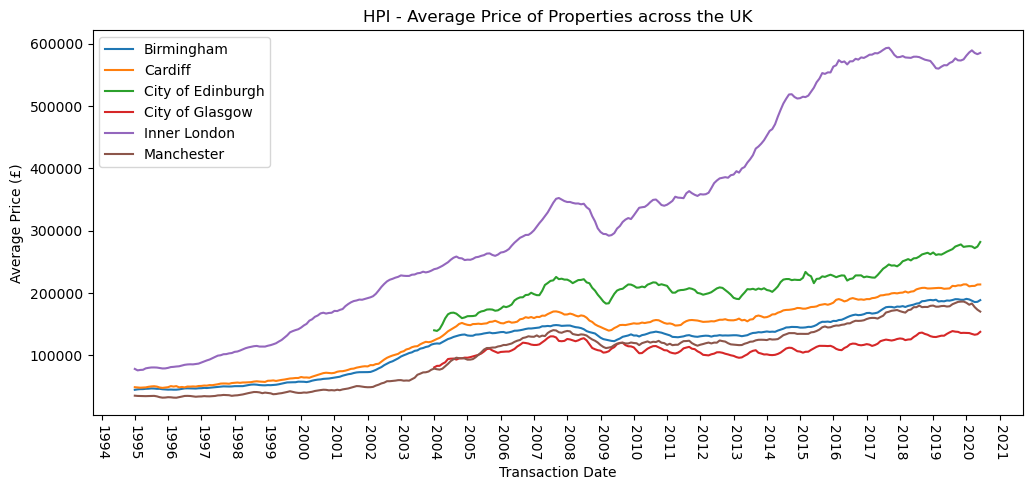

In [61]:
plt.figure(figsize=(12,5))
for region,group in house_price_index.groupby(['RegionName']):
    plt.plot(group['Date'],
             group['AveragePrice'],
             label=region)
plt.legend()
plt.title('HPI - Average Price of Properties across the UK')
plt.ylabel('Average Price (£)')
plt.xlabel('Transaction Date')
plt.xticks(rotation=-90)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(YearLocator())

#save the plot
plt.savefig("/Users/Work/Documents/GitHub/Data-Analytic-Project-1/UK-HPI/Average-price-of-properties-across-uk.png")

plt.show()

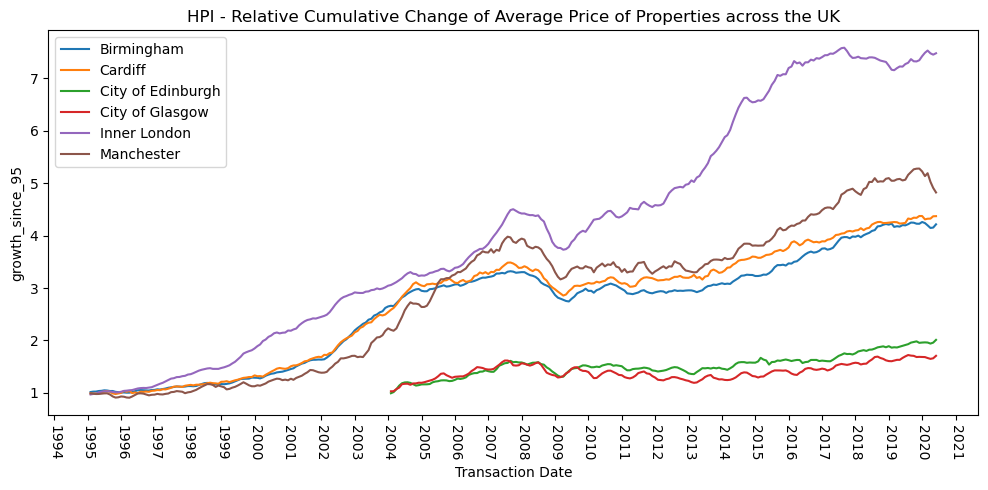

In [62]:
plt.figure(figsize=(12,5))
for region,group in house_price_index.groupby(['RegionName']):
    plt.plot(group['Date'],
             (1+group['AveragePrice'].pct_change()).cumprod(),
             label=region)
plt.legend()
plt.title('HPI - Relative Cumulative Change of Average Price of Properties across the UK')
plt.ylabel('growth_since_95')
plt.xlabel('Transaction Date')
plt.xticks(rotation=-90)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(YearLocator())

#save the plot
plt.savefig("/Users/Work/Documents/GitHub/Data-Analytic-Project-1/UK-HPI/Cumulative-change-price-of-property-types.png")

plt.show()

lewis
The average house price in London has increased almost 8 times when compared the the price that it was in 1995

In [63]:
house_price_index = house_price_index[house_price_index['RegionName']=='Inner London']


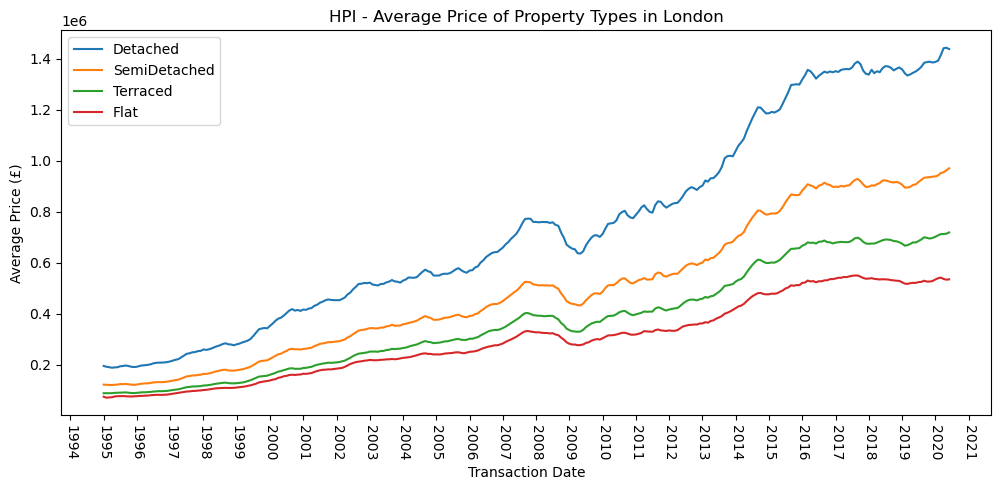

In [64]:
plt.figure(figsize=(12,5))
for house_type in ['Detached','SemiDetached','Terraced','Flat']:
    plt.plot(house_price_index['Date'],
             house_price_index[house_type+'Price'],
             label=house_type)
plt.legend()
plt.title('HPI - Average Price of Property Types in London')
plt.ylabel('Average Price (£)')
plt.xlabel('Transaction Date')
plt.xticks(rotation=-90)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(YearLocator())

#save the plot
plt.savefig("/Users/Work/Documents/GitHub/Data-Analytic-Project-1/UK-HPI/Average-price-of-property-types.png")

plt.show()